## Questions
Overarching: 
-How similar or different are field 2017 samples from lab 2018 samples?
-What ASVs are shared across all oysters?
-What ASVs are shared across all oysters and not found in mussels or clams?

Field(2017): 
-Is there any site effect?
-Are there ASVs associated with perkinsus infection? Associated with increasing perkinsus infection?
-Are there ASVs associated with presence of a pea crab?
-Are there ASVs associated with growth patterns?

Lab (2018): 
-How similar or different are the microbiomes of the four species? 
-What ASVs are uniquely shared between oysters in the polyculture treatments and mussels? 
-Are there ASVs associated with growth patterns?

Some ideas on how to look for differences:
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0237779

https://link.springer.com/article/10.1186/s12859-020-03803-z
https://academic.oup.com/bioinformatics/article/36/17/4544/5843784

Taking into account phylogeny:
https://www.frontiersin.org/articles/10.3389/fmicb.2018.01391/full



In [ ]:
#make everything underscores
asv_all=apply(asv_all, 2, function(x) gsub("-","_",x))
meta=apply(meta, 2, function(x) gsub("-","_",x))

In [ ]:
write.csv(asv_all, file="~/Documents/DE_16S/ASVs/Run123_ASV_nochim.csv")

In [ ]:
write.csv(meta, file="~/Documents/DE_16S/DE16S_allmeta.csv")

In [59]:
require(data.table)
require(dada2)
require(phyloseq)
require(ggplot2)
require(RColorBrewer)
options(repr.plot.width=20, repr.plot.height=15)

In [11]:
meta=fread("~/Documents/DE_16S/DE16S_allmeta.csv")
asv_all=fread("~/Documents/DE_16S/ASVs/Run123_ASV_nochim.csv")
taxa=read.csv("~/Documents/DE_16S/ASVs/Run123_taxa.csv", header=TRUE, row.names=1)

In [12]:
#fix rownames
rows=as.vector(asv_all[,1])
asv_all=asv_all[,-1]
asv_all=apply(asv_all, 2, as.numeric)
row.names(asv_all)=rows$V1

In [13]:
#negative controls 
negs=meta[meta$Experiment=="Negative",]
negcounts=asv_all[row.names(asv_all) %in% negs$UniqueID,]
remove=negcounts[,colSums(negcounts)>0]
#asv_all=asv_all[,!colnames(asv_all) %in% colnames(remove)]

In [14]:
remove

,TACGTAGGGGGCGAACGTTGTTCGGAATCACTGGGCGTAAAGGGTGCGCAGGCTGCTCATCAAGTCAGTTGTGAAATTTCGTGGCTCAACCACGAAGCTGCTGCTGATACTGTTGGGCTAGAGTCATAGATAGAGGTAGCGGGAATTCCTGGTGTAGGAGTGAAATCTGTAGATATCAGGAGGAACACCAAGGGTGAAGACAAGCTACTGGGTAATGACTGACGCTGAGGCACGAAAGCTAGGGGAGCAAATGGG,TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGCGGTTTATTAAGTCTGAAGTTAAAGCTCGGTGCTCAACACCGACCCGCTTTGGATACTGATAGACTAGAGTTATATAGAGGTTAGCGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAGCTAACTGGATATACACTGACGCTGAGGAACGAAAGCGTGGGGAGCAAACAGG,TACGTATGTCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGAGTCTAGGCGGTTTGTTAAGTCAGATGTGAAAATGCGGGGCTCAACTCCGTATGGCCTTTGATACTGGCAAACTAGAGTACTGGAGAGGTGGGCGGAACTACAAGTGTAGAGGTGAAATTCGTAGATATTTGTAGGAATGCCGATAGTGAAGACAGCTCACTGGACAGATACTGACGCTAAAGCTCGAAAGCGTGGGGAGCAAACAGG,TTCCAGCTCCAATAGCGTATATTAAAGTTGCTGCAGTTAAAAAGCTCGTAGCTGGATCTCGGGTCCAGGCTGGCGGTCCACCTCGTTGTGGTTACTGCCTGTTCTGACCCAACCTCTCGGTTGTAAACCCTTGGTGCTCTTGATTGAGTTGCTTCGGGTGGCCGAAACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGATTCGCCTGCACAATGGTGCATGGAATAATGGAATAGGACCTCGGTTCTATTTTGTTGGTTTTCGGAACACGAGGTAATGATTAAGAGGGACTGACGGGGGCATTCGTATGGCGGGGTTAGAGGTGAAATTCTTGGATCCTCGCCAGACGGCCTACAGCGAAAGCATTTGCCAAGCATGTTTTCATTAGTCAAGAACGAAAGTCAGAGGTTCGAAGACG,GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGAGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGATATTGGAAAGAACACCGATGGCGAAAGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG,TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGTGGTCAAGAAAGTCTGAAGTTAAAGCTCGGGGCTCAACCCCGACCCGCTTTGGAAACTACTTGACTAGAGTCATGAAGAGGTTAGCGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAGCTAACTGGGAATGAACTGACACTGAGGGACGAAAGCGTGGGGAGCAAACAGG,TACGGAGGGTGCGAGCGTTAATCGGATTTACTGGGCGTAAAGCGAGCGTAGGCGGCTGTGTAAGTTGGATGTGAAATCCCGGGGCTTAACCCCGGAACTGCATCCAAAACTGCAGAGCTAGAGTACAGTAGAGGGAGGTAGAATTTCCGGTGTAGCGGTGAAATGCGTAGAGATCGGAAGGAATACCAGTGGCGAAGGCGGCCTCCTGGACTGATACTGACGCTGAGGTTCGAAAGCGTGGGGAGCAAACAGG,GACGGAGGATGCAAGTGTTATCCGGAATCACTGGGCGTAAAGCGTCTGTAGGTGGTTTAATAAGTCAACTGTTAAATCTTGAGGCTCAACTTCAAAATCGCAGTCGAAACTATTAGACTAGAGTATAGTAGGGGTAAAGGGAATTTCCAGTGGAGCGGTGAAATGCGTAGAGATTGGAAAGAACACCGATGGCGAAGGCACTTTACTGGGCTATTACTAACACTCAGAGACGAAAGCTAGGGTAGCAAATGGG,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTAATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACATAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTTCGTAGGCGGTTTATTAAGTCTAAAGTTAAAGCCTGGGGCTCAACCCCAGCCCGCTTTGGATACTGGTAGACTAGAGTTATAGAGAGGTTAGTGGAACTCCATGTGAAGCGGTGGAATGCGTAGATATATGGAAGAACACCAATGGCGAAGGCAACTAACTGGCTATACACAGACGCTGAGGAACGAAAGCGTGGGGAGCAAACAGG,TACGGGGGGTGCTAGCGTTAATCGGAATTACTGGGCGTAAAGAGTTTGTAGGCGGTTTGATAAGTCAGATGTGAAAGACCTAAGCTCAACTTAGGAAGTGCATATGATACTGTCTAACTAGAGTTTAACAGAGGATTAAGGAATTTTCGGTGTAGCGGTGAAATGCGTAGATATCGAAAGGAACATCAATGGCGAAGGCAATAATCTGGGATTAGACTGACGCTGAGAAACGAAAGCTTGGGTAGCAAACAGG,TACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGAGCTCGTAGGTGGTTTGTCGCGTCGTCTGTGAAATCCCGGGGCTTAACTTCGGGCGTGCAGGCGATACGGGCATAACTTGAGTGCTGTAGGGGAGACTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAGGAACACCGATGGCGAAGGCAGGTCTCTGGGCAGTAACTGACGCTGAGGAGCGAAAGCATGGGTAGCGAACAGG,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTCTGTCAAGTCGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCCGAAACTGGCAGGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGG,TACGAGAGGGGCAAGCGTT

In [15]:
#pull out the dilution effect samples
meta_de=meta[meta$Experiment=="Field17"|meta$Experiment=="Lab18",]

In [16]:
asv_de=asv_all[rownames(asv_all) %in% meta_de$UniqueID,]

In [17]:
NCOL(asv_all)

[1] 16383

In [18]:
asv_de=asv_de[,colSums(asv_de)>0]

In [19]:
NCOL(asv_de)

[1] 14760

In [20]:
#make taxa list that just applies to de samples
taxa_de=taxa[rownames(taxa)%in% colnames(asv_de),]

In [21]:
NROW(taxa_de)

[1] 14760

In [22]:
taxa_de=as.matrix(taxa_de)

In [23]:
taxa_de=as.matrix(taxa_de)
meta_de=as.data.frame(meta_de)
row.names(meta_de)=meta_de$UniqueID

In [24]:
OTU = otu_table(t(asv_de), taxa_are_rows = TRUE)
TAX = tax_table(taxa_de)
SAMP=sample_data(meta_de)

In [25]:
OTU=transform_sample_counts(OTU, function(x) 1E6 * x/sum(x))

# how similar are microbiomes across studies (field/lab, VA/MD, 2017/2018)

In [26]:
DE = phyloseq(OTU, TAX, SAMP)

In [27]:
DE.ord <- ordinate(DE, "NMDS", "bray", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1595674 
Run 1 stress 0.2057687 
Run 2 stress 0.1866557 
Run 3 stress 0.1832498 
Run 4 stress 0.1633661 
Run 5 stress 0.1929594 
Run 6 stress 0.1756157 
Run 7 stress 0.1940521 
Run 8 stress 0.168779 
Run 9 stress 0.1685993 
Run 10 stress 0.1748684 
Run 11 stress 0.1953468 
Run 12 stress 0.1831456 
Run 13 stress 0.1894504 
Run 14 stress 0.1693982 
Run 15 stress 0.1943791 
Run 16 stress 0.1832375 
Run 17 stress 0.1959539 
Run 18 stress 0.199066 
Run 19 stress 0.1665113 
Run 20 stress 0.1595674 
... Procrustes: rmse 4.699169e-05  max resid 0.000634172 
... Similar to previous best
*** Solution reached


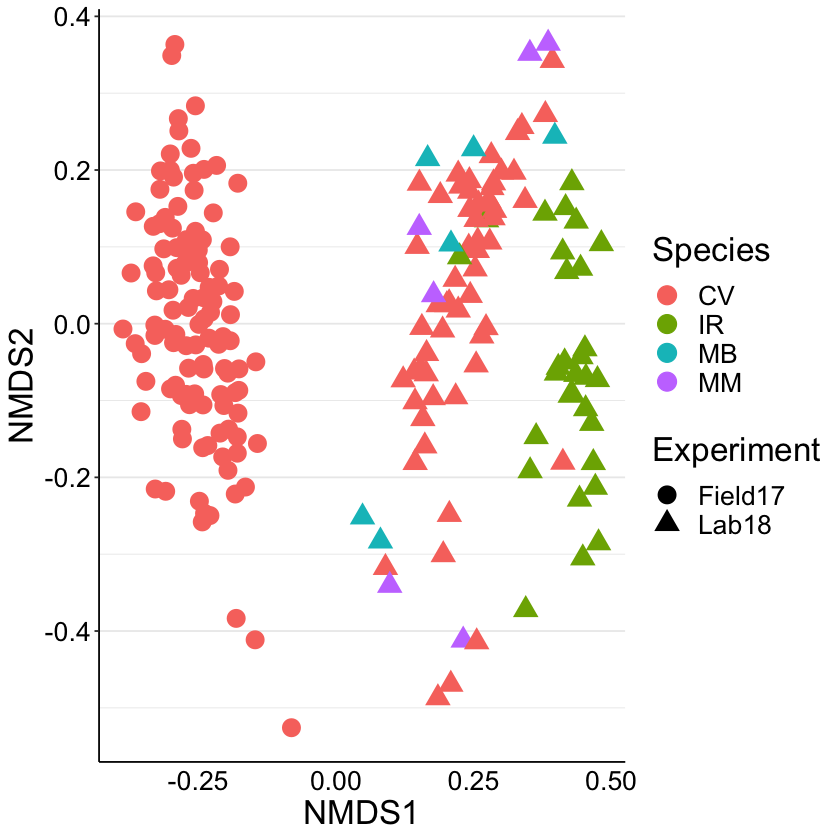

In [28]:
plot_ordination(DE, DE.ord, type="samples", color="Species", shape="Experiment")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

In [29]:
#top 100 taxa
DE_100 = prune_taxa(names(sort(taxa_sums(DE),TRUE)[1:100]), DE)

In [30]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(21)


In [31]:
mycolors

[1] "#1B9E77" "#5D874E" "#A07125" "#D35F0A" "#B16548" "#8D6B86" "#8068AE"
 [8] "#A850A0" "#D03792" "#D33B79" "#A66753" "#79932E" "#7FA718" "#ACA80E"
[15] "#D9AA04" "#D59D08" "#BF8B12" "#A9781B" "#927132" "#7C6B4C" "#666666"

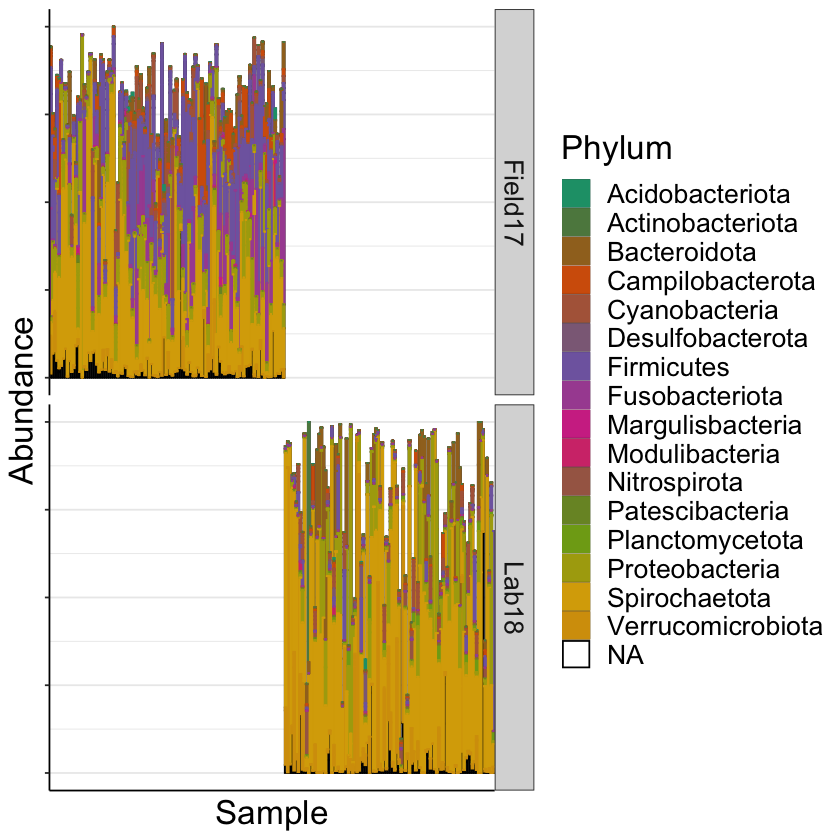

In [32]:
plot_bar(DE_100,  fill="Phylum") +
geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")+
facet_grid(Experiment~., scales = "free_x")+
scale_fill_manual(values=mycolors)+
scale_color_manual(values=mycolors)+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_blank(),
          text = element_text(size=20))

# 2018 Lab experiment

In [33]:
DE17=subset_samples(DE, Year=="2017")
DE18=subset_samples(DE, Year=="2018")

In [34]:
DE18CV=subset_samples(DE18, Species=="CV")
DE18M=subset_samples(DE18, Species=="MB"| Species=="MM")

In [35]:
DE18.ord <- ordinate(DE18, "NMDS", "bray", trymax=100)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1906192 
Run 1 stress 0.1906205 
... Procrustes: rmse 0.0006214943  max resid 0.005636769 
... Similar to previous best
Run 2 stress 0.2355687 
Run 3 stress 0.1986094 
Run 4 stress 0.1906192 
... Procrustes: rmse 5.984775e-06  max resid 4.993162e-05 
... Similar to previous best
Run 5 stress 0.2333731 
Run 6 stress 0.198451 
Run 7 stress 0.2167927 
Run 8 stress 0.2297451 
Run 9 stress 0.2281848 
Run 10 stress 0.219507 
Run 11 stress 0.2416912 
Run 12 stress 0.2069995 
Run 13 stress 0.2101888 
Run 14 stress 0.2476409 
Run 15 stress 0.2177763 
Run 16 stress 0.2144272 
Run 17 stress 0.2505397 
Run 18 stress 0.2441598 
Run 19 stress 0.2214633 
Run 20 stress 0.216299 
*** Solution reached


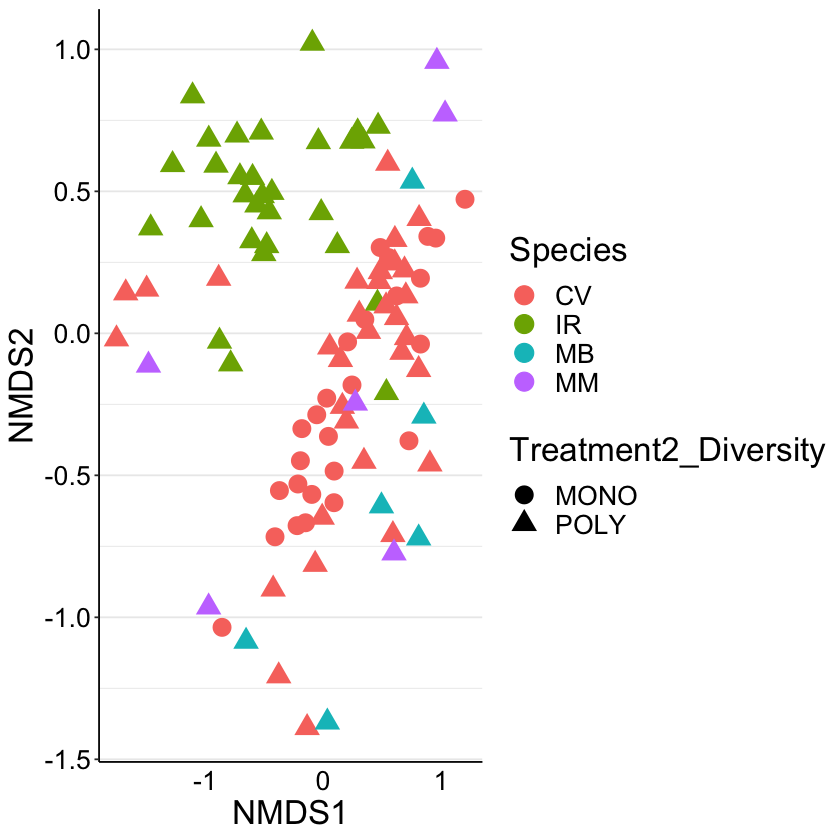

In [40]:
plot_ordination(DE18, DE18.ord, type="samples", color="Species", shape="Treatment2_Diversity")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

In [37]:
DE18CV.ord <- ordinate(DE18CV, "NMDS", "bray", trymax=100)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1706463 
Run 1 stress 0.1706299 
... New best solution
... Procrustes: rmse 0.02403564  max resid 0.1231522 
Run 2 stress 0.1732164 
Run 3 stress 0.1651964 
... New best solution
... Procrustes: rmse 0.07648109  max resid 0.3208192 
Run 4 stress 0.1750016 
Run 5 stress 0.1658387 
Run 6 stress 0.1565654 
... New best solution
... Procrustes: rmse 0.06115629  max resid 0.3400383 
Run 7 stress 0.156604 
... Procrustes: rmse 0.003941983  max resid 0.02556565 
Run 8 stress 0.1747608 
Run 9 stress 0.168263 
Run 10 stress 0.1737396 
Run 11 stress 0.1705494 
Run 12 stress 0.1637448 
Run 13 stress 0.1776429 
Run 14 stress 0.1671222 
Run 15 stress 0.1629361 
Run 16 stress 0.1637449 
Run 17 stress 0.1718886 
Run 18 stress 0.1704911 
Run 19 stress 0.1680554 
Run 20 stress 0.171534 
Run 21 stress 0.167428 
Run 22 stress 0.1792439 
Run 23 stress 0.1697212 
Run 24 stress 0.1734546 
Run 25 stress 0.4003863 
Run 26 stress 0.1629

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


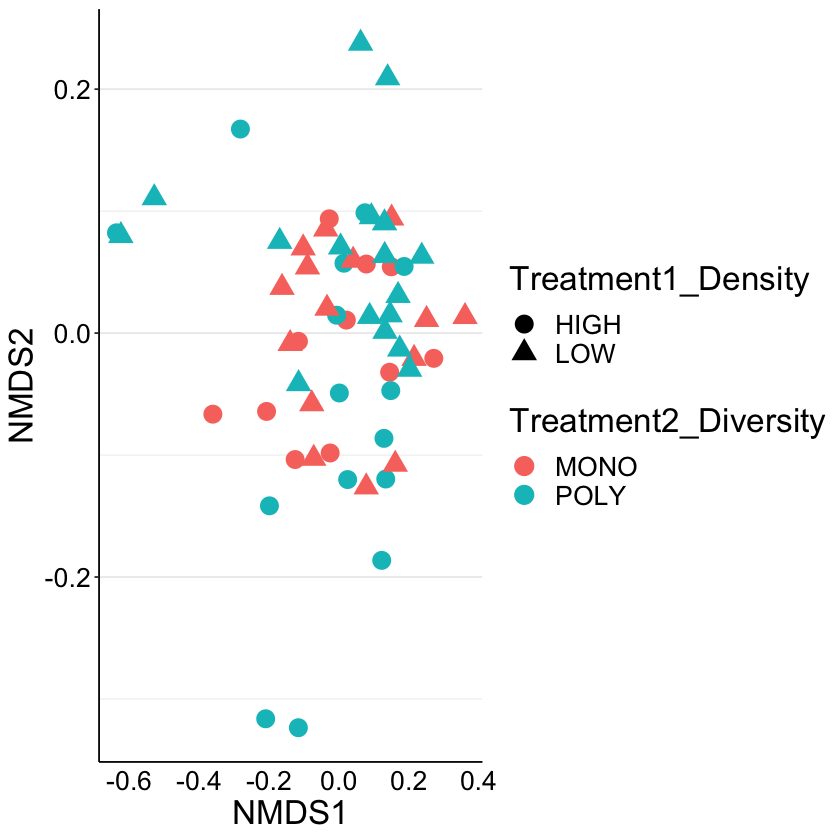

In [41]:
plot_ordination(DE18CV, DE18CV.ord, type="samples", color="Treatment2_Diversity", shape="Treatment1_Density")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

In [42]:
#top 100 taxa
DE18_100 = prune_taxa(names(sort(taxa_sums(DE18),TRUE)[1:100]), DE18)

In [43]:
mycolors= colorRampPalette(brewer.pal(8, "Dark2"))(39)

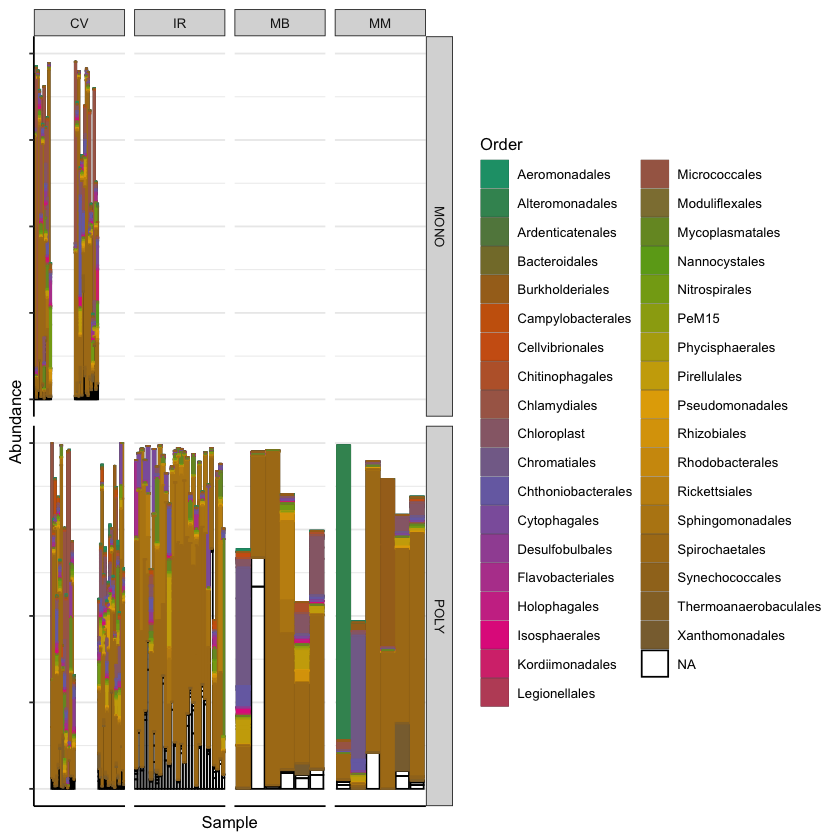

In [45]:
plot_bar(DE18_100,  fill="Order") +
facet_grid(Treatment2_Diversity~Species, scales = "free_x")+
geom_bar(aes(color=Order, fill=Order), stat="identity", position="stack")+
scale_fill_manual(values=mycolors, drop=TRUE)+
scale_color_manual(values=mycolors, drop=TRUE)+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_blank(),
          text = element_text(size=10))

In [46]:
#top 100 taxa
DE_100 = prune_taxa(names(sort(taxa_sums(DE),TRUE)[1:100]), DE)

In [216]:
DE17pos

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14743 taxa and 78 samples ]
sample_data() Sample Data:       [ 78 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 14743 taxa by 6 taxonomic ranks ]

In [218]:
DE17pos.ord <- ordinate(DE17pos, "NMDS", "jaccard", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.2529488 
Run 1 stress 0.2504103 
... New best solution
... Procrustes: rmse 0.04867207  max resid 0.1988074 
Run 2 stress 0.2530209 
Run 3 stress 0.2545586 
Run 4 stress 0.2505265 
... Procrustes: rmse 0.03909983  max resid 0.1753747 
Run 5 stress 0.2458588 
... New best solution
... Procrustes: rmse 0.05162306  max resid 0.1915237 
Run 6 stress 0.2576897 
Run 7 stress 0.2529135 
Run 8 stress 0.2457339 
... New best solution
... Procrustes: rmse 0.03359652  max resid 0.1928773 
Run 9 stress 0.2465999 
Run 10 stress 0.2458613 
... Procrustes: rmse 0.03350054  max resid 0.1936795 
Run 11 stress 0.2535001 
Run 12 stress 0.2463018 
Run 13 stress 0.2500126 
Run 14 stress 0.2468355 
Run 15 stress 0.2527082 
Run 16 stress 0.2499257 
Run 17 stress 0.2519933 
Run 18 stress 0.2499633 
Run 19 stress 0.2485331 
Run 20 stress 0.2500516 
Run 21 stress 0.2517647 
Run 22 stress 0.2454952 
... New best solution
... Procrustes: r

Run 260 stress 0.2467095 
Run 261 stress 0.2460375 
Run 262 stress 0.251166 
Run 263 stress 0.247671 
Run 264 stress 0.2603482 
Run 265 stress 0.2479107 
Run 266 stress 0.2481468 
Run 267 stress 0.2477027 
Run 268 stress 0.2482609 
Run 269 stress 0.2485506 
Run 270 stress 0.2518375 
Run 271 stress 0.2458067 
... Procrustes: rmse 0.01463655  max resid 0.07236861 
Run 272 stress 0.2497683 
Run 273 stress 0.2518998 
Run 274 stress 0.2506982 
Run 275 stress 0.2481304 
Run 276 stress 0.2485614 
Run 277 stress 0.2521908 
Run 278 stress 0.2510635 
Run 279 stress 0.2544715 
Run 280 stress 0.2524039 
Run 281 stress 0.2509123 
Run 282 stress 0.2478315 
Run 283 stress 0.2499806 
Run 284 stress 0.2512169 
Run 285 stress 0.2466047 
Run 286 stress 0.2490853 
Run 287 stress 0.2458579 
... Procrustes: rmse 0.008113017  max resid 0.04329867 
Run 288 stress 0.2464756 
Run 289 stress 0.2530604 
Run 290 stress 0.2480437 
Run 291 stress 0.2462258 
Run 292 stress 0.2459506 
... Procrustes: rmse 0.03001538  

Run 529 stress 0.2493343 
Run 530 stress 0.2524767 
Run 531 stress 0.2527152 
Run 532 stress 0.24864 
Run 533 stress 0.2539339 
Run 534 stress 0.254386 
Run 535 stress 0.2484132 
Run 536 stress 0.247845 
Run 537 stress 0.2459454 
... Procrustes: rmse 0.034047  max resid 0.1956863 
Run 538 stress 0.2509439 
Run 539 stress 0.2468554 
Run 540 stress 0.2476747 
Run 541 stress 0.2532138 
Run 542 stress 0.2525978 
Run 543 stress 0.2477712 
Run 544 stress 0.2487309 
Run 545 stress 0.24704 
Run 546 stress 0.2463541 
Run 547 stress 0.2518406 
Run 548 stress 0.2486412 
Run 549 stress 0.2539878 
Run 550 stress 0.2501637 
Run 551 stress 0.2457393 
... Procrustes: rmse 0.01145004  max resid 0.07321413 
Run 552 stress 0.2497689 
Run 553 stress 0.2468984 
Run 554 stress 0.2483222 
Run 555 stress 0.2530842 
Run 556 stress 0.2528903 
Run 557 stress 0.2528956 
Run 558 stress 0.2497834 
Run 559 stress 0.2528046 
Run 560 stress 0.2549527 
Run 561 stress 0.2481234 
Run 562 stress 0.247721 
Run 563 stress 0

Run 810 stress 0.2486538 
Run 811 stress 0.2511135 
Run 812 stress 0.2462995 
Run 813 stress 0.2486917 
Run 814 stress 0.2516516 
Run 815 stress 0.2509242 
Run 816 stress 0.253016 
Run 817 stress 0.2471972 
Run 818 stress 0.2465305 
Run 819 stress 0.2460579 
Run 820 stress 0.2468231 
Run 821 stress 0.2457875 
... Procrustes: rmse 0.01218833  max resid 0.07077235 
Run 822 stress 0.2491207 
Run 823 stress 0.2520611 
Run 824 stress 0.2554677 
Run 825 stress 0.2498692 
Run 826 stress 0.2488736 
Run 827 stress 0.2511179 
Run 828 stress 0.2454954 
... Procrustes: rmse 0.004388531  max resid 0.03079523 
Run 829 stress 0.2499697 
Run 830 stress 0.2458082 
... Procrustes: rmse 0.01282565  max resid 0.07298834 
Run 831 stress 0.2468988 
Run 832 stress 0.246965 
Run 833 stress 0.2459165 
... Procrustes: rmse 0.03380652  max resid 0.1956851 
Run 834 stress 0.2521059 
Run 835 stress 0.2461869 
Run 836 stress 0.2476026 
Run 837 stress 0.2529463 
Run 838 stress 0.2485856 
Run 839 stress 0.2455033 
..

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


In [47]:
plot_ordination(DE17, DE17.ord, type="samples", color="RFTM_score", shape="Species")+ 
#facet_wrap("Species")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

Warning message in scores(ordination, choices = axes, display = "species", physeq = physeq):
“restarting interrupted promise evaluation”
Warning message in plot_ordination(DE17, DE17.ord, type = "samples", color = "RFTM_score", :
“Could not obtain coordinates from the provided `ordination`. 
Please check your ordination method, and whether it is supported by `scores` or listed by phyloseq-package.”


NULL

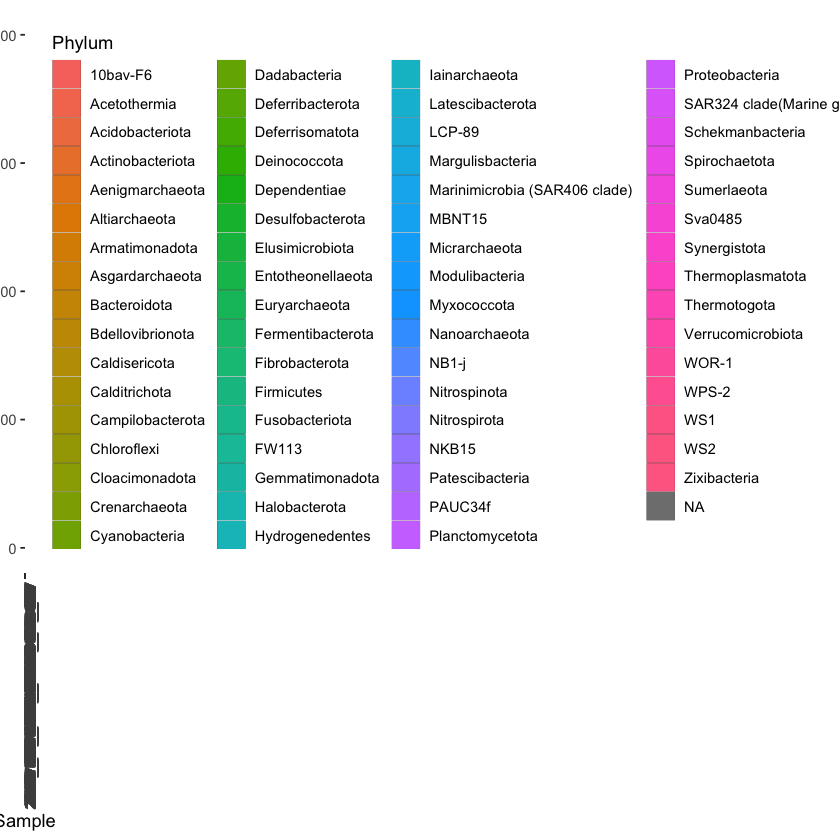

In [48]:
plot_bar(DE17,  fill="Phylum") +
geom_bar(aes(color=Phylum, fill=Phylum), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))


In [49]:
DE17fr = filter_taxa(DE17, function(x) mean(x) > 1e-4, TRUE)

In [50]:
DE17

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14760 taxa and 112 samples ]
sample_data() Sample Data:       [ 112 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 14760 taxa by 6 taxonomic ranks ]

In [51]:
DE17.ord <- ordinate(DE17, "NMDS", "bray", trymax=500, k=3)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1948345 
Run 1 stress 0.1944128 
... New best solution
... Procrustes: rmse 0.02578495  max resid 0.1702553 
Run 2 stress 0.1951817 
Run 3 stress 0.1930476 
... New best solution
... Procrustes: rmse 0.04599889  max resid 0.1517997 
Run 4 stress 0.1940319 
Run 5 stress 0.1953609 
Run 6 stress 0.1927019 
... New best solution
... Procrustes: rmse 0.008774781  max resid 0.059214 
Run 7 stress 0.1931226 
... Procrustes: rmse 0.01709847  max resid 0.1208725 
Run 8 stress 0.1932792 
Run 9 stress 0.1928914 
... Procrustes: rmse 0.01762442  max resid 0.1195499 
Run 10 stress 0.1928075 
... Procrustes: rmse 0.01485727  max resid 0.1296647 
Run 11 stress 0.1972333 
Run 12 stress 0.1927308 
... Procrustes: rmse 0.01999943  max resid 0.1220107 
Run 13 stress 0.1943074 
Run 14 stress 0.1949927 
Run 15 stress 0.1930298 
... Procrustes: rmse 0.01993299  max resid 0.1573888 
Run 16 stress 0.1930317 
... Procrustes: rmse 0.0220

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


In [52]:
DE17fr.ord <- ordinate(DE17fr, "NMDS", "bray", trymax=500, k=3)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1948345 
Run 1 stress 0.1931007 
... New best solution
... Procrustes: rmse 0.03679934  max resid 0.1436932 
Run 2 stress 0.1924664 
... New best solution
... Procrustes: rmse 0.01841678  max resid 0.1268098 
Run 3 stress 0.1955682 
Run 4 stress 0.1925467 
... Procrustes: rmse 0.01144802  max resid 0.09164241 
Run 5 stress 0.192749 
... Procrustes: rmse 0.007428179  max resid 0.06130972 
Run 6 stress 0.1937109 
Run 7 stress 0.1928472 
... Procrustes: rmse 0.0192136  max resid 0.1268069 
Run 8 stress 0.1927116 
... Procrustes: rmse 0.01425483  max resid 0.09275712 
Run 9 stress 0.1925805 
... Procrustes: rmse 0.006822333  max resid 0.06552605 
Run 10 stress 0.1928644 
... Procrustes: rmse 0.01384284  max resid 0.1101908 
Run 11 stress 0.192995 
Run 12 stress 0.1948484 
Run 13 stress 0.1928822 
... Procrustes: rmse 0.02274979  max resid 0.163874 
Run 14 stress 0.1928563 
... Procrustes: rmse 0.02031862  max resid 

Run 170 stress 0.1928989 
... Procrustes: rmse 0.02226251  max resid 0.1657036 
Run 171 stress 0.197989 
Run 172 stress 0.1955753 
Run 173 stress 0.1926545 
... Procrustes: rmse 0.008132361  max resid 0.07194222 
Run 174 stress 0.1943177 
Run 175 stress 0.1928944 
... Procrustes: rmse 0.01213638  max resid 0.1104587 
Run 176 stress 0.1928386 
... Procrustes: rmse 0.01248301  max resid 0.1134039 
Run 177 stress 0.192476 
... Procrustes: rmse 0.01442159  max resid 0.1234454 
Run 178 stress 0.1972821 
Run 179 stress 0.1930588 
Run 180 stress 0.1945991 
Run 181 stress 0.1970335 
Run 182 stress 0.1939111 
Run 183 stress 0.1928946 
... Procrustes: rmse 0.02247023  max resid 0.1655003 
Run 184 stress 0.1944945 
Run 185 stress 0.1928286 
... Procrustes: rmse 0.01971723  max resid 0.1273388 
Run 186 stress 0.1948392 
Run 187 stress 0.1929314 
Run 188 stress 0.192975 
Run 189 stress 0.192957 
Run 190 stress 0.1973865 
Run 191 stress 0.1930253 
Run 192 stress 0.1952752 
Run 193 stress 0.192433 
.

Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


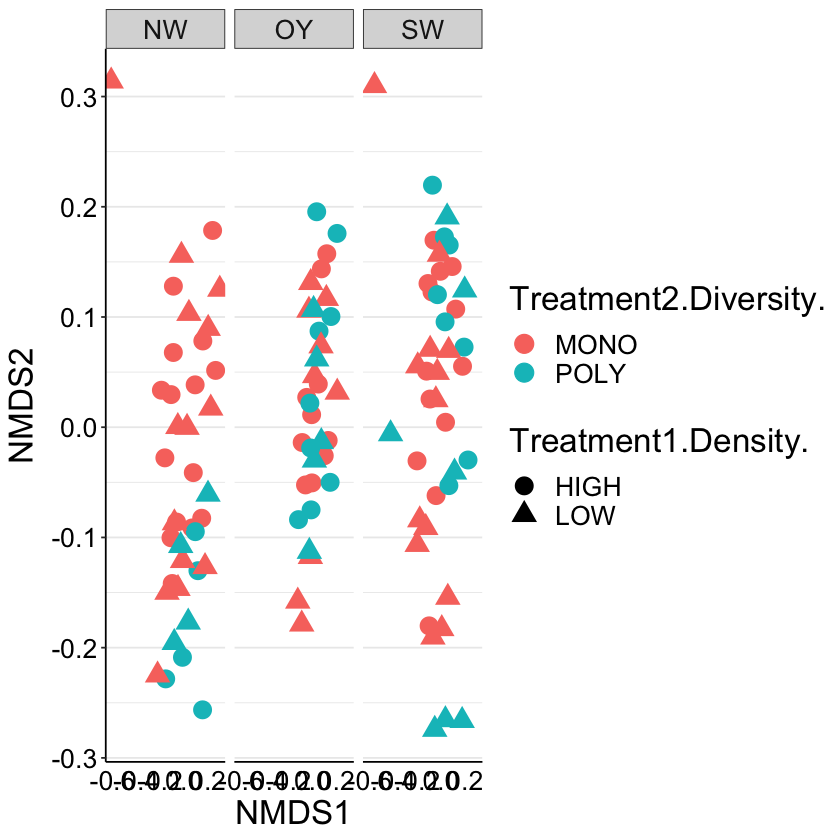

In [193]:
plot_ordination(DE17, DE17.ord, type="samples", shape="Treatment1.Density.", color="Treatment2.Diversity.")+ 
facet_wrap("Site")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

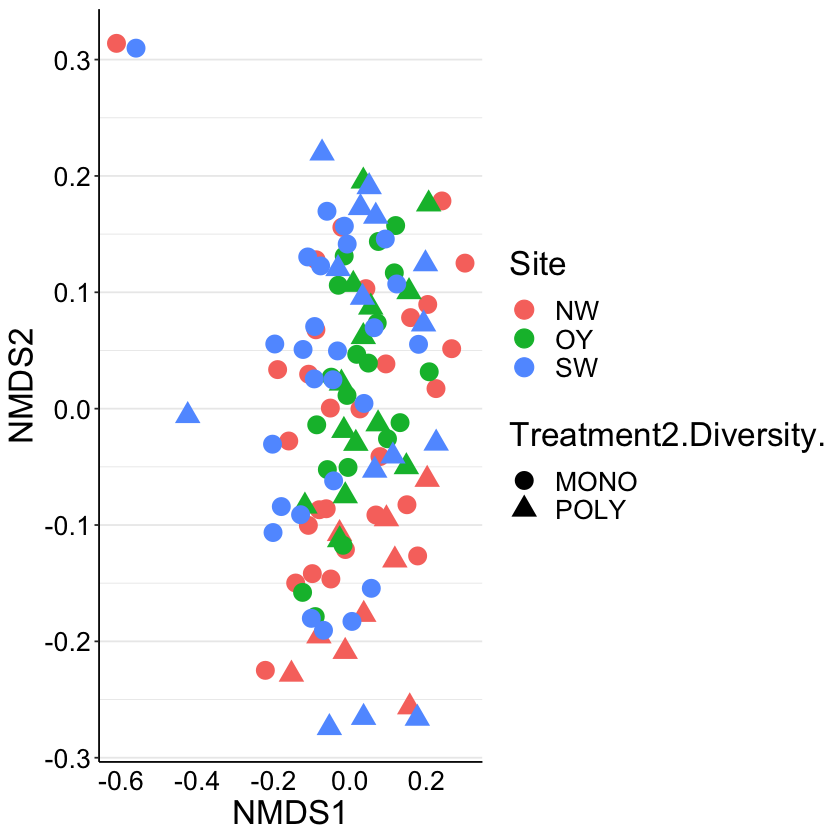

In [210]:
plot_ordination(DE17, DE17.ord, type="samples", shape="Treatment2.Diversity.", color="Site")+ 
#facet_wrap("Site")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

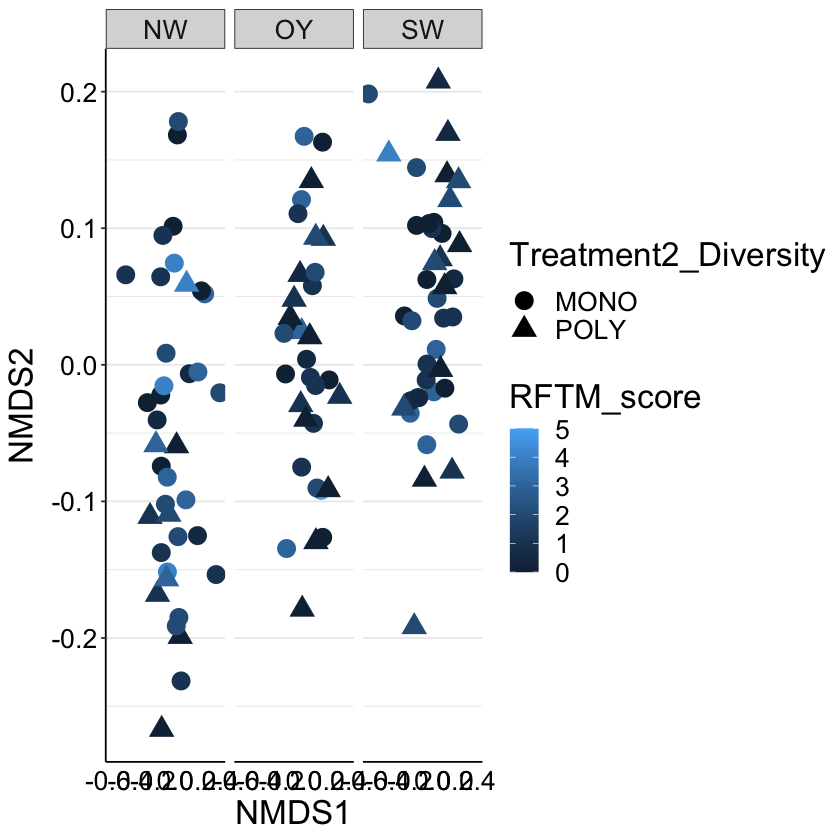

In [54]:
plot_ordination(DE17, DE17.ord, type="samples", color="RFTM_score", shape="Treatment2_Diversity")+ 
facet_wrap("Site")+
#geom_polygon(aes(fill=Phase_1_DO))+ 
geom_point(size=5)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))

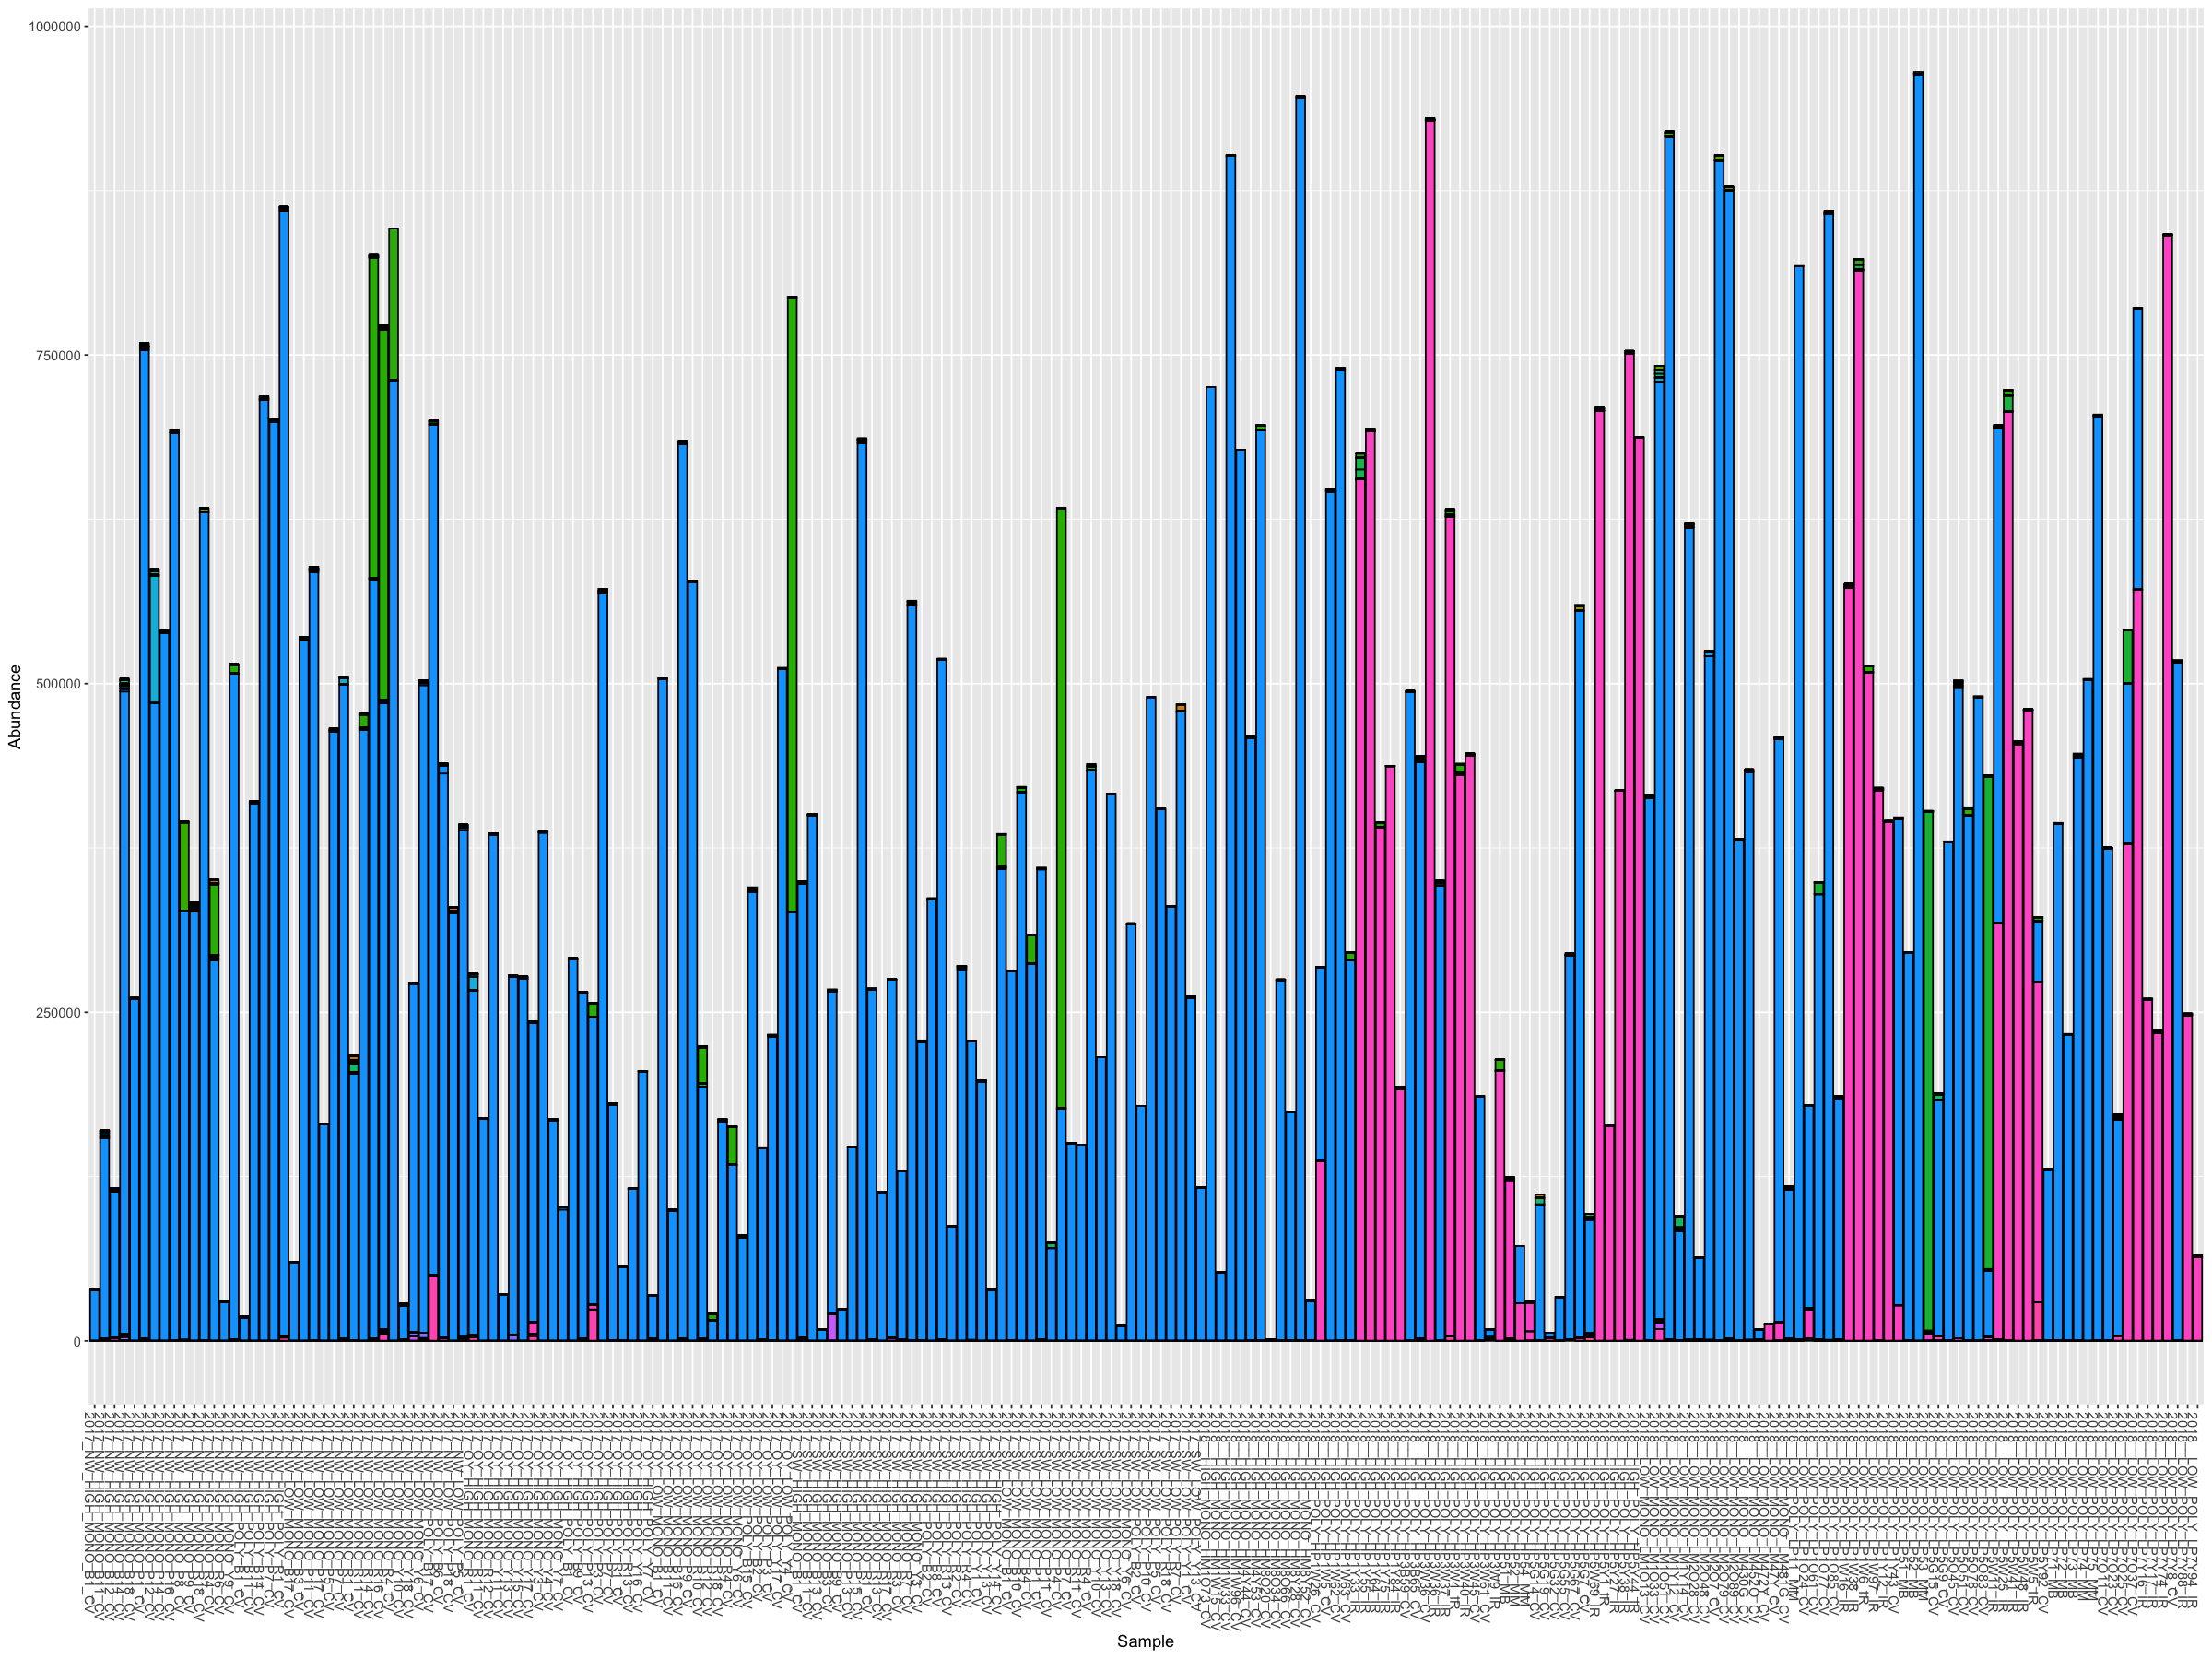

In [63]:
DE_Spiro = subset_taxa(DE, Phylum=="Spirochaetota")
plot_bar(DE_Spiro, fill="OTU")+
theme(legend.position = "none")

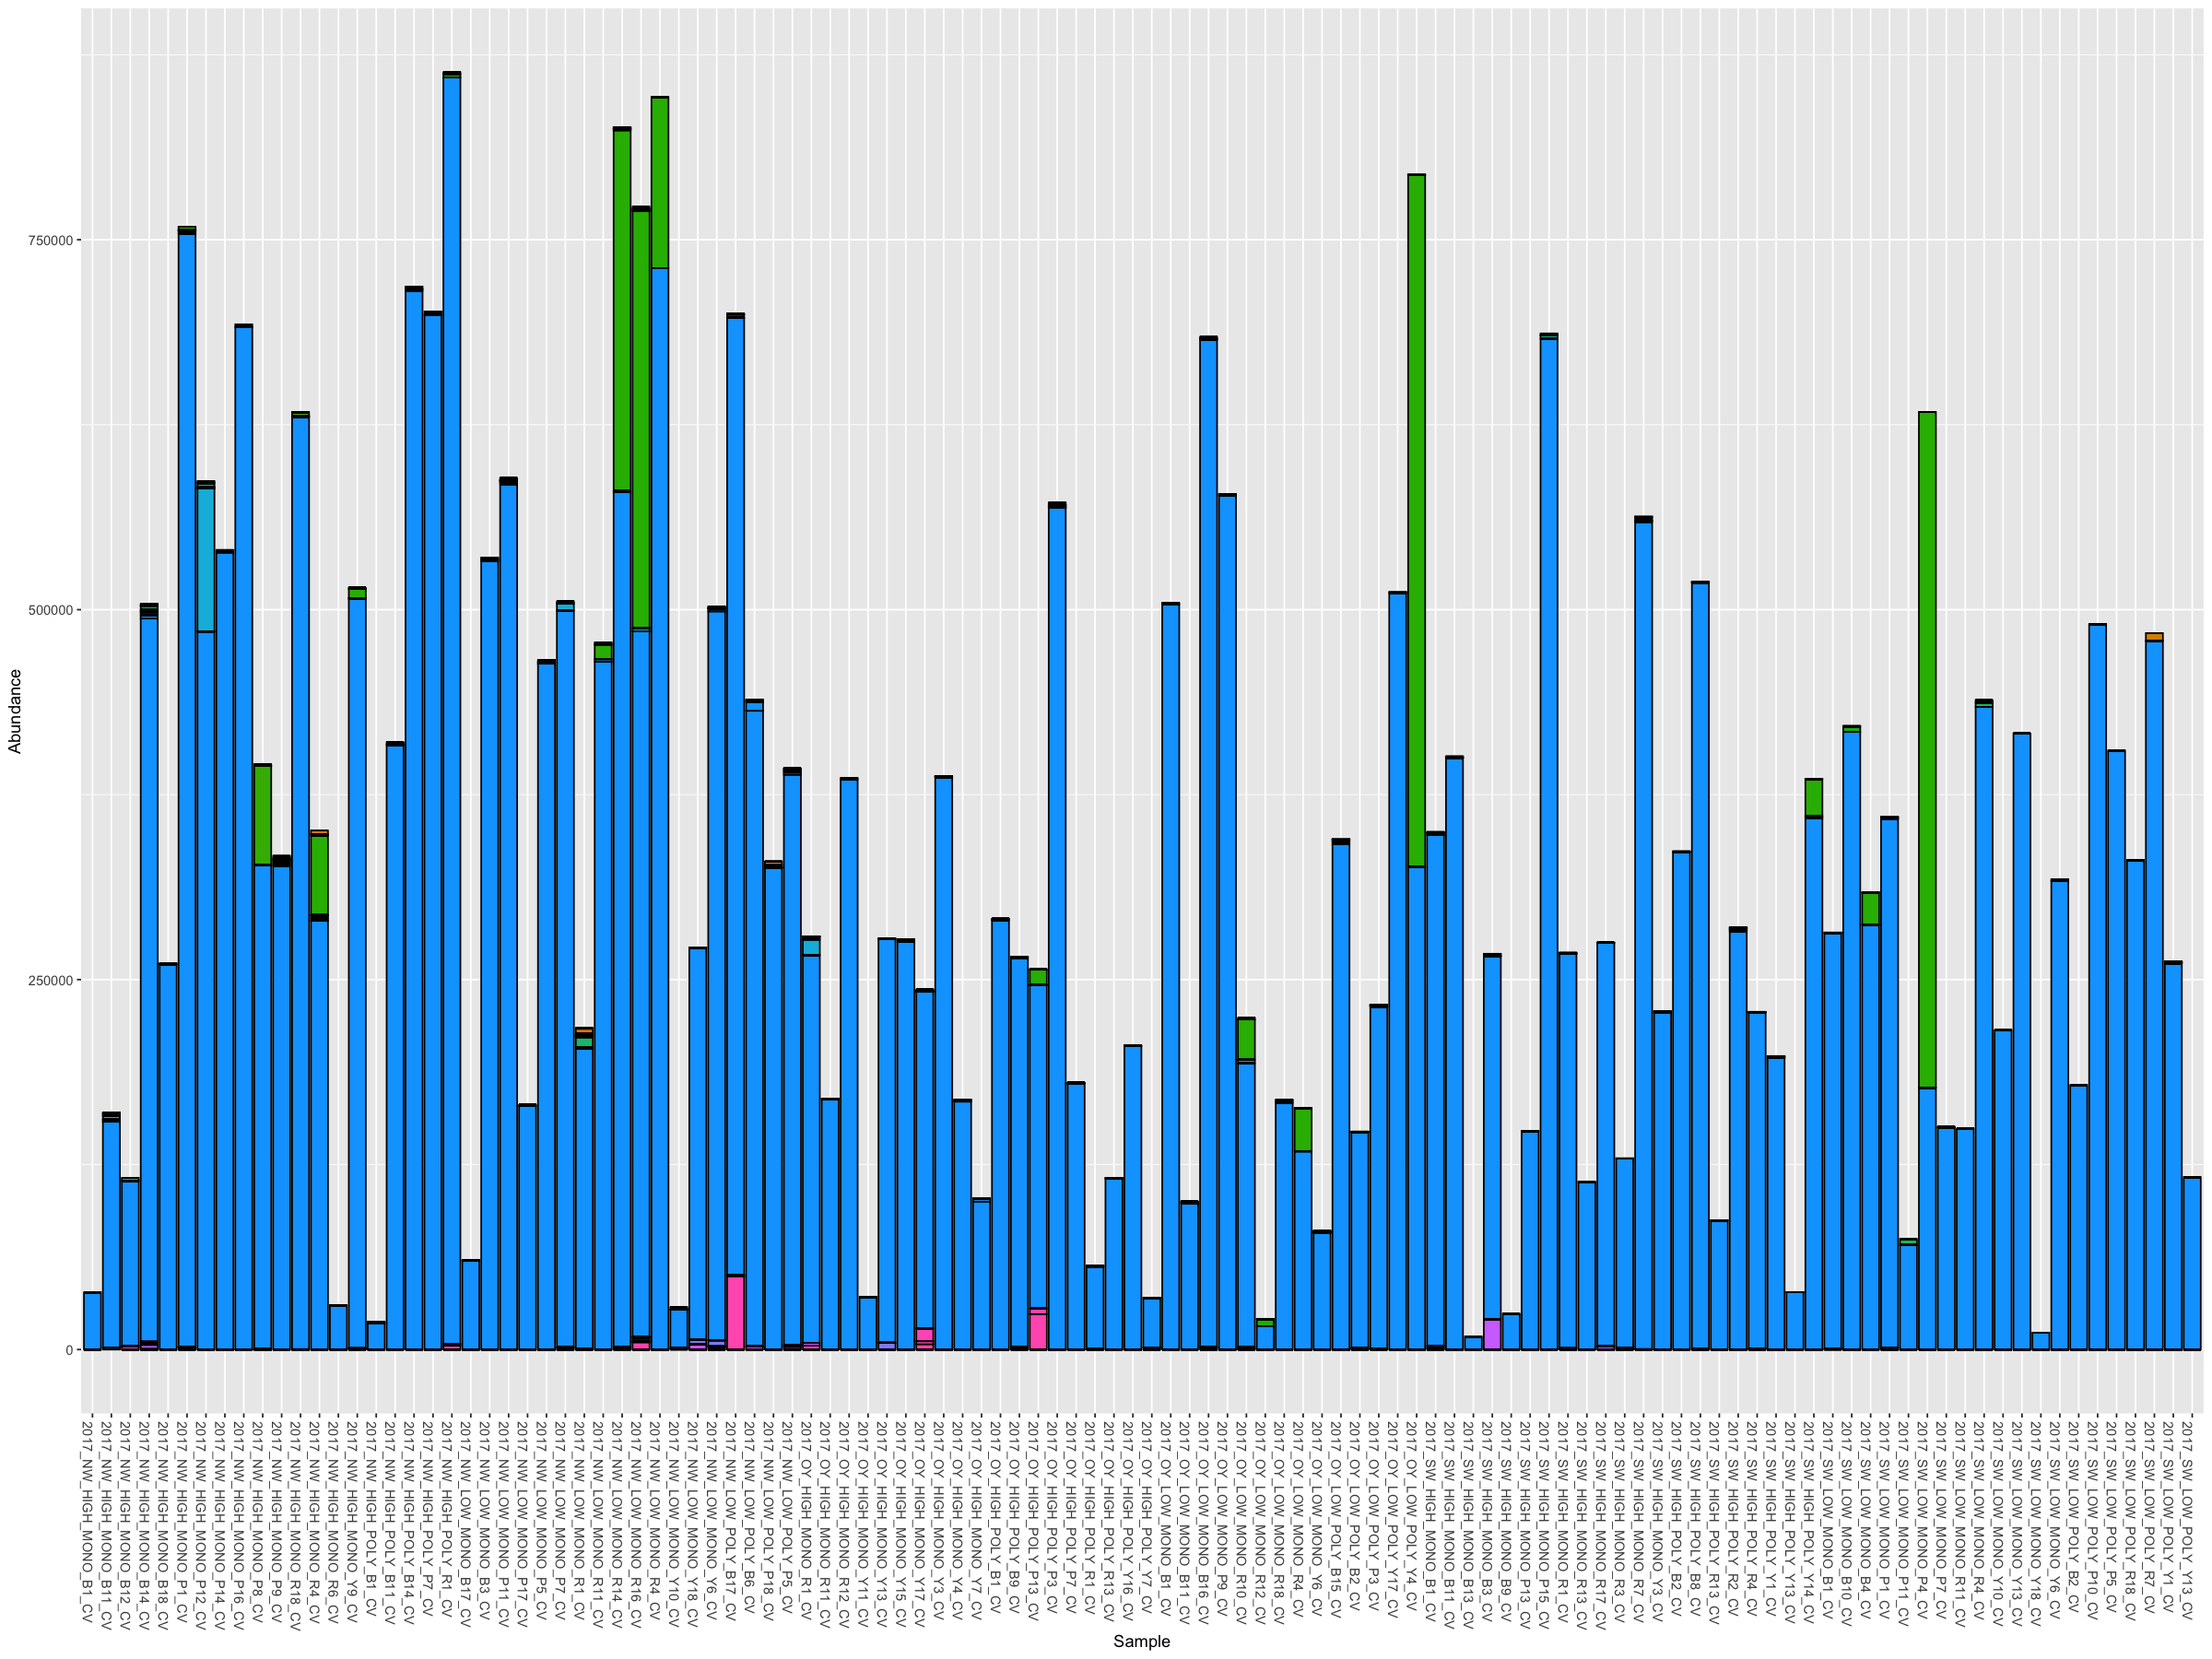

In [60]:
DE17_Spiro = subset_taxa(DE17, Phylum=="Spirochaetota")
plot_bar(DE17_Spiro, fill="OTU")+
theme(legend.position = "none")

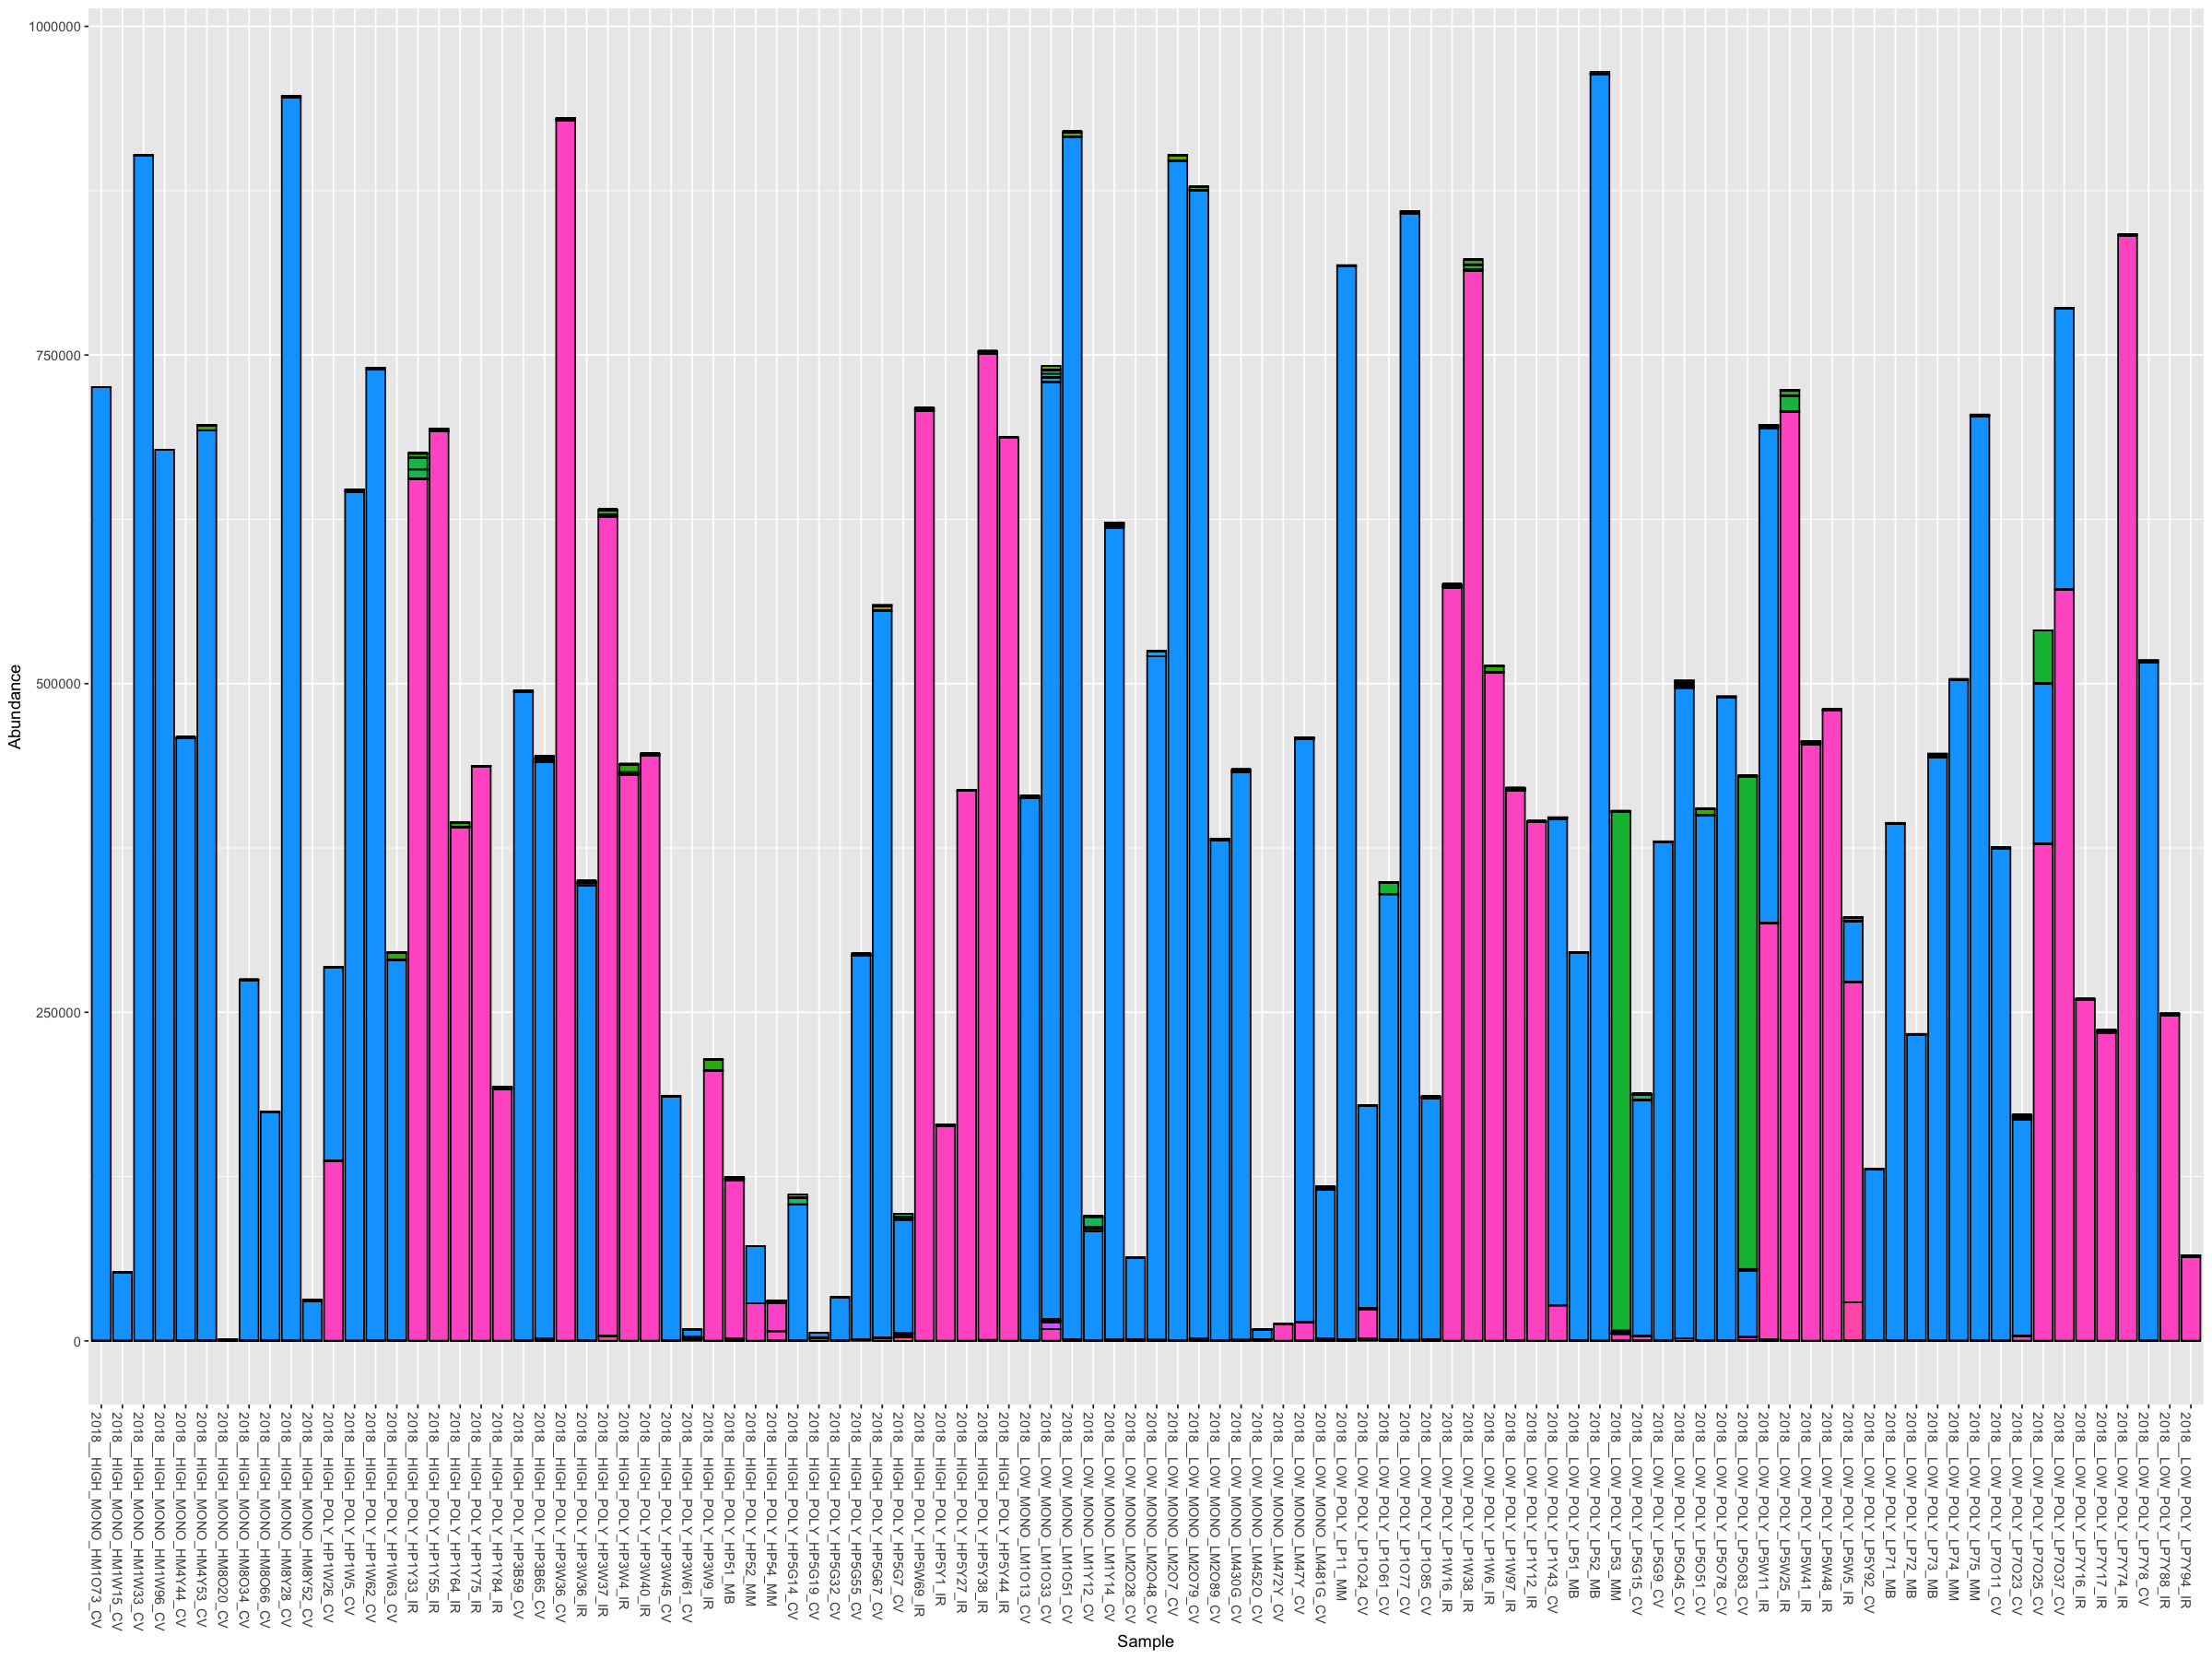

In [61]:
DE18_Spiro = subset_taxa(DE18, Phylum=="Spirochaetota")
plot_bar(DE18_Spiro, fill="OTU")+
theme(legend.position = "none")